# Notebook prática

## Imports

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import os

pd.set_option('display.max_columns', None)

customPal = sns.diverging_palette(100, 0, 74, 39, 19, 2, center='dark')
cmap = sns.diverging_palette(
    0, 100, 74, 39, 19, 25, center='light', as_cmap=True)
sns.set_theme(style="white", palette='RdYlGn_r', font_scale=1.25)

## Funções

In [63]:
def plot_bars(df, features, n_rows, n_cols, title, figsize):

    fig = plt.figure(figsize=figsize)
    for i, feat in enumerate(features):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        sns.countplot(data=df, x=feat, ax=ax)

    fig.suptitle(title)
    fig.show()

In [64]:
def plot_hists(df, features, n_rows, n_cols, title, figsize):

    fig = plt.figure(figsize=figsize)
    for i, feat in enumerate(features):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        sns.histplot(df[feat], bins=20, ax=ax, kde=True)

    fig.suptitle(title)
    fig.show()

In [65]:
def chisquare(data, target, alpha=0.05):

    features_cat = data.select_dtypes(exclude=['float', 'int']).columns
    for feat in features_cat:
        data_crosstab = pd.crosstab(data[feat], data[target], margins=False)
        _, p, _, _ = chi2_contingency(data_crosstab)

        if p <= alpha:
            print(f'Há dependencia entre {feat} e {target}. P-valor: {p}')
        else:
            print(f'Não há dependencia entre {feat} e {target}. P-valor: {p}')

In [66]:
def corr_2_cols(df, col1, col2):
    res = df.groupby([col1, col2]).size().unstack()
    res['frequencia(%)'] = (res[res.columns[1]] /
                            (res[res.columns[0]] + res[res.columns[1]]))
    return res

## Sumário

1. [Descrição do dataset](#description)
2. [Ingestão dos dados](#ingestion)
3. [Análise expoloratória inicial](#eda)
4. [Análise univariada](#uda)
5. [Análise multivariada](#mda)
6. [Análise de inconsistências](#incon)
7. [Feature Engineering](#feateng)


## Descrição do dataset
<a id='description'></a>
Fonte:[
default of credit card clients Data Set](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#)

__Dicionário__

* **ID**  - Código de identificação do cliente
* **LIMIT_BAL** - Montante do crédito concedido (em dólar): inclui o crédito individual ao consumidor e o crédito à família (complementar).
* **SEX** - Sexo (1 = Masculino, 2 = Feminino)     
* **EDUCATION** - Nível de escolaridade (1 = pós-graduação; 2 = universidade; 3 = ensino médio; 4 = outros)
* **MARRIAGE** - Estado civíl (1 = casado; 2 = solteiro; 3 = outros)
* **AGE** - idade em anos     
* **PAY_0** - Status de pagamento em Setembro de 2005 (-1 = pagamento devidamente; 1 = atraso no pagamento por um mês; 2 = atraso no pagamento por dois meses; . . .; 8 = atraso no pagamento por oito meses; 9 = atraso no pagamento por nove meses e acima).  
* **PAY_2** - Status de pagamento em Agosto de 2005   
* **PAY_3** - Status de pagamento em Julho de 2005   
* **PAY_4** - Status de pagamento em Junho de 2005   
* **PAY_5** - Status de pagamento em Maio de 2005   
* **PAY_6** - Status de pagamento em Abril de 2005      
* **BILL_AMT1** - Valor do extrato da fatura (em dólar) em Setembro de 2005
* **BILL_AMT2** - Valor do extrato da fatura (em dólar) em Agosto de 2005
* **BILL_AMT3** - Valor do extrato da fatura (em dólar) em Julho de 2005
* **BILL_AMT4** - Valor do extrato da fatura (em dólar) em Junho de 2005
* **BILL_AMT5** - Valor do extrato da fatura (em dólar) em Maio de 2005
* **BILL_AMT6** - Valor do extrato da fatura (em dólar) em Abril de 2005
* **PAY_AMT1** - Valor do pagamento anterior (em dólar)  em Setembro de 2005
* **PAY_AMT2** - Valor do pagamento anterior (em dólar)  em Agosto de 2005
* **PAY_AMT3** - Valor do pagamento anterior (em dólar)  em Julho de 2005
* **PAY_AMT4** - Valor do pagamento anterior (em dólar)  em Junho de 2005
* **PAY_AMT5** - Valor do pagamento anterior (em dólar)  em Maio de 2005
* **PAY_AMT6** - Valor do pagamento anterior (em dólar)  em Abril de 2005 
* **default payment next month** - (0=Não | 1=Sim) Se o cliente é default no mês seguinte (Outubro)

## Ingestão dos dados

<a id='ingestion'></a>

In [67]:
PATH = 'data/'
FILENAME = 'default of credit card clients.xls'

df = pd.read_excel(os.path.join(PATH, FILENAME), header=[1])
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1


## Análise exploratória inicial
<a id='eda'></a>

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [69]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Valores ausentes

In [70]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

### Duplicados

In [71]:
print(df.duplicated().sum(), 'valores duplicados')

0 valores duplicados


### Variáveis categóricas

In [72]:
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [73]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [74]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

### Variáveis numéricas

In [75]:
df[['AGE', 'LIMIT_BAL']].describe()

,AGE,LIMIT_BAL
count,30000.000000,30000.000000
mean,35.485500,167484.322667
std,9.217904,129747.661567
min,21.000000,10000.000000
25%,28.000000,50000.000000
50%,34.000000,140000.000000
75%,41.000000,240000.000000
max,79.000000,1000000.000000


In [76]:
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [77]:
print('Valores únicos de status de pagamento:', sorted(df['PAY_0'].unique()))

Valores únicos de status de pagamento: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]


In [78]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [79]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


__Considerações iniciais__
* No dataset não há valores missing ou duplicados
* As variáveis de status de pagamento (``PAY_0``, ..., ``PAY_6``) possuem valores entre -2 e 8. Fazendo uma busca rápida, descobri que -2 significa que não houve utilização do crédito e 0 signifca uso do crédito rotativo [[1]](https://www.researchgate.net/publication/326171439_Default_Payment_Analysis_of_Credit_Card_Clients).
* Valores negativos nas variáveis de extrato da fatura (``BILL_AMT1``, ..., ``BILL_AMT6``) indicam que o cliente pagou acima do valor devido, no entanto, essa hipótese será verificada nas análises posteriores.
* As variáveis ``SEX``e ``AGE``estão dentro dos valores normais. A idade dos clientes varia entre 21 e 79 anos e a variável sexo possui apenas as categorias masculino e feminino.   
* As variáveis ``EDUCATION``e ``MARRIAGE`` apresentam valores fora das faixas especificadas na base, portanto, esses valores serão agrupados entre as categorias conhecidas.   
``EDUCATION`` = 5, 6 e 0 será agrupada na categoria 4   
``MARRIAGE`` = 0 será agrupada na categoria 3

In [80]:
df.loc[df['EDUCATION'].isin([5, 6, 0]), 'EDUCATION'] = 4
df.loc[df['MARRIAGE'].isin([0]), 'MARRIAGE'] = 3

### Renomeando colunas

In [81]:
df.rename(columns={'default payment next month': 'y',
                   'PAY_0': 'pgto_set',
                   'PAY_2': 'pgto_ago',
                   'PAY_3': 'pgto_jul',
                   'PAY_4': 'pgto_jun',
                   'PAY_5': 'pgto_mai',
                   'PAY_6': 'pgto_abr',
                   'PAY_AMT1': 'pgto_amt_set',
                   'PAY_AMT2': 'pgto_amt_ago',
                   'PAY_AMT3': 'pgto_amt_jul',
                   'PAY_AMT4': 'pgto_amt_jun',
                   'PAY_AMT5': 'pgto_amt_mai',
                   'PAY_AMT6': 'pgto_amt_abr',
                   'BILL_AMT1': 'fatura_set',
                   'BILL_AMT2': 'fatura_ago',
                   'BILL_AMT3': 'fatura_jul',
                   'BILL_AMT4': 'fatura_jun',
                   'BILL_AMT5': 'fatura_mai',
                   'BILL_AMT6': 'fatura_abr',
                   'SEX': 'genero',
                   'EDUCATION': 'educacao',
                   'LIMIT_BAL': 'limite',
                   'AGE': 'idade',
                   'MARRIAGE': 'estado_civil'}, inplace=True)

## Análise univariada

Aqui as variáveis categóricas serão renomeadas para facilitar a interpretação dos gráficos.

In [82]:
df['genero'] = df['genero'].replace({1: 'masculino', 2: 'feminino'})
df['educacao'] = df['educacao'].replace(
    {1: 'pós-graduação', 2: 'superior', 3: 'ensino médio', 4: 'outros'})
df['estado_civil'] = df['estado_civil'].replace(
    {1: 'casado', 2: 'solteiro', 3: 'outros'})

In [83]:
df.head()

,ID,limite,genero,educacao,estado_civil,idade,pgto_set,pgto_ago,pgto_jul,pgto_jun,pgto_mai,pgto_abr,fatura_set,fatura_ago,fatura_jul,fatura_jun,fatura_mai,fatura_abr,pgto_amt_set,pgto_amt_ago,pgto_amt_jul,pgto_amt_jun,pgto_amt_mai,pgto_amt_abr,y
0,1,20000,feminino,superior,casado,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,feminino,superior,solteiro,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,feminino,superior,solteiro,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,feminino,superior,casado,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,masculino,superior,casado,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [84]:
df_pgto = df[['pgto_set', 'pgto_ago', 'pgto_jul',
              'pgto_jun', 'pgto_mai', 'pgto_abr']]
df_fatura = df[['fatura_set', 'fatura_ago', 'fatura_jul',
                'fatura_jun', 'fatura_mai', 'fatura_abr']]
df_pgto_amt = df[['pgto_amt_set', 'pgto_amt_ago', 'pgto_amt_jul',
                  'pgto_amt_jun', 'pgto_amt_mai', 'pgto_amt_abr']]

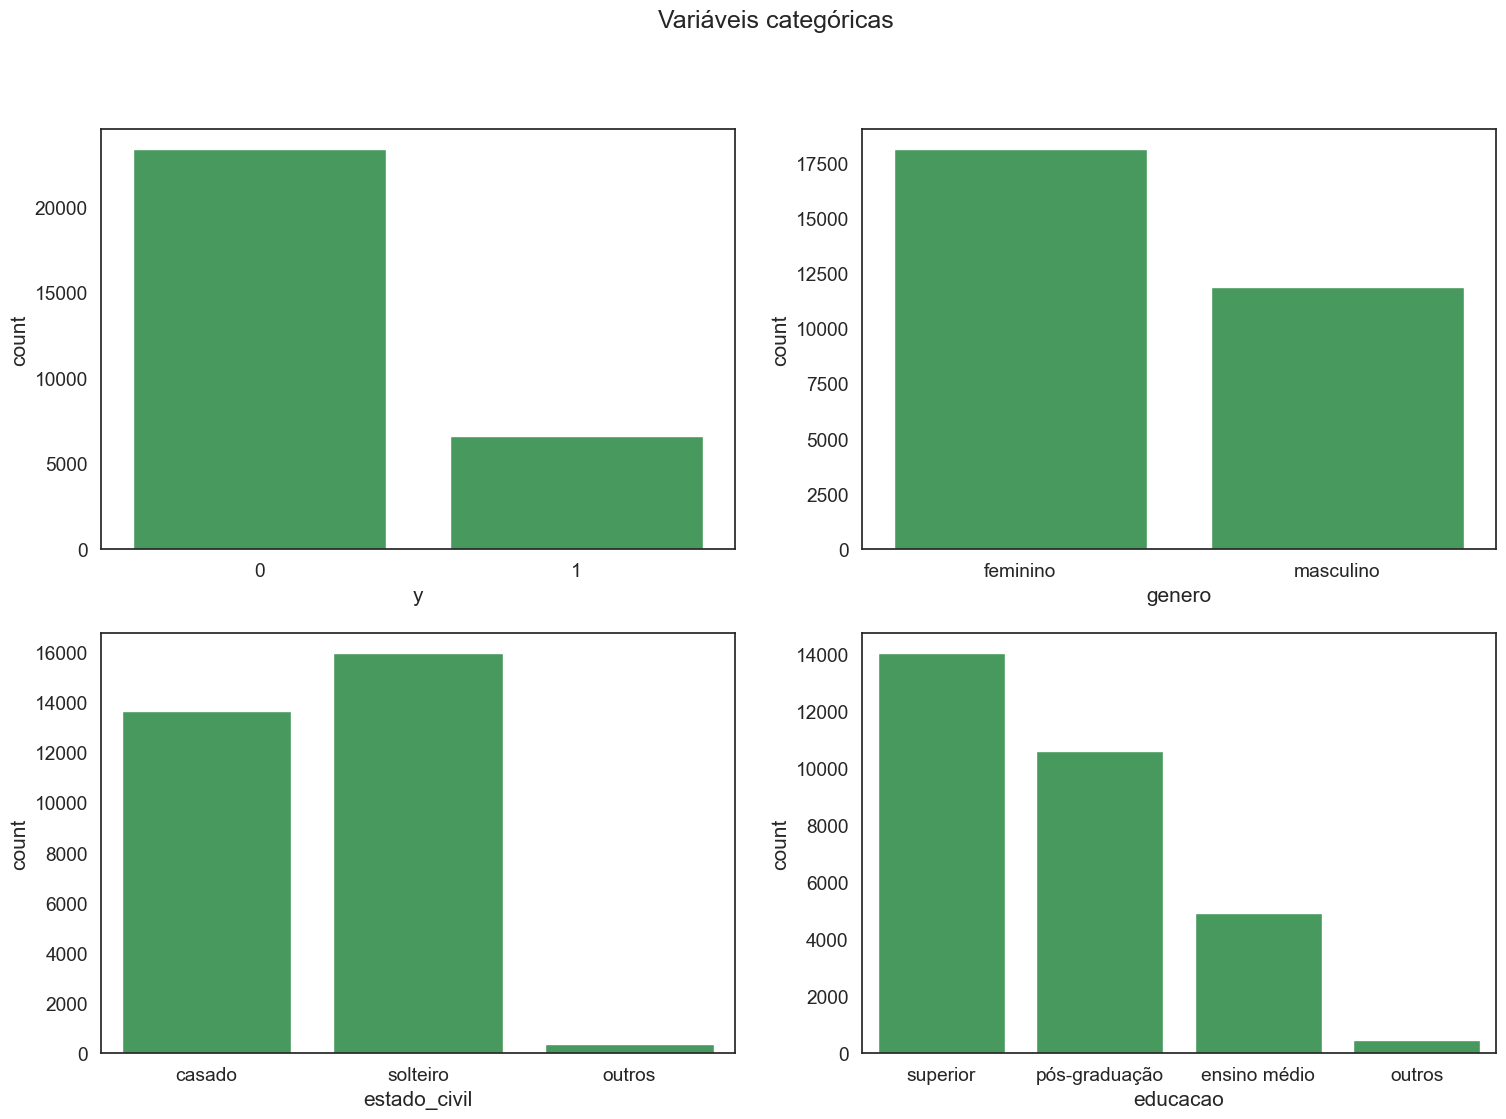

In [85]:
plot_bars(df, features=['y', 'genero', 'estado_civil', 'educacao'], n_rows=2, n_cols=2,
          title='Variáveis categóricas', figsize=(18, 12))

In [86]:
df['limite'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: limite, dtype: float64

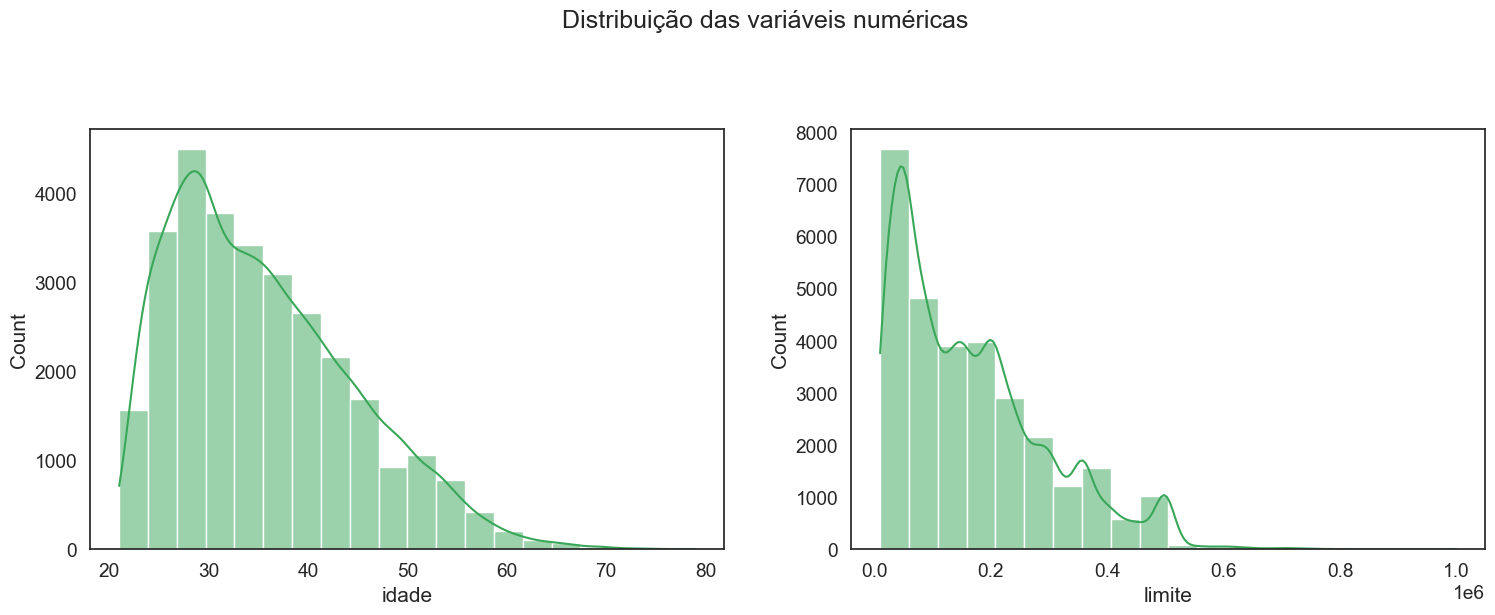

In [87]:
plot_hists(df, features=['idade', 'limite'], n_rows=2, n_cols=2,
           title='Distribuição das variáveis numéricas', figsize=(18, 12))

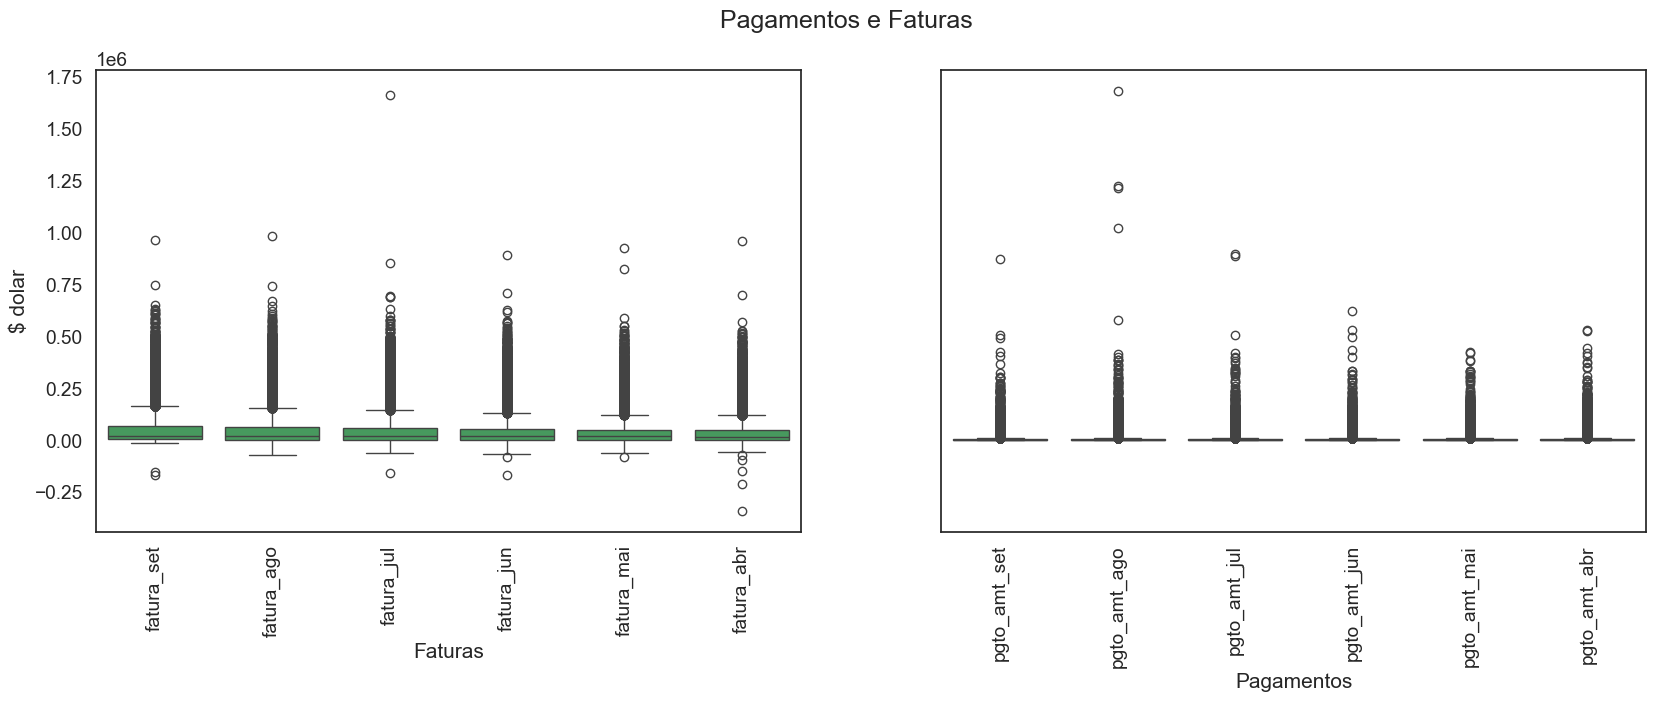

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
sns.boxplot(x="Faturas", y="$ dolar", data=pd.melt(
    df_fatura, var_name='Faturas', value_name='$ dolar'), ax=ax[0])
sns.boxplot(x="Pagamentos", y="$ dolar", data=pd.melt(
    df_pgto_amt, var_name='Pagamentos', value_name='$ dolar'), ax=ax[1])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.suptitle('Pagamentos e Faturas')
plt.show()

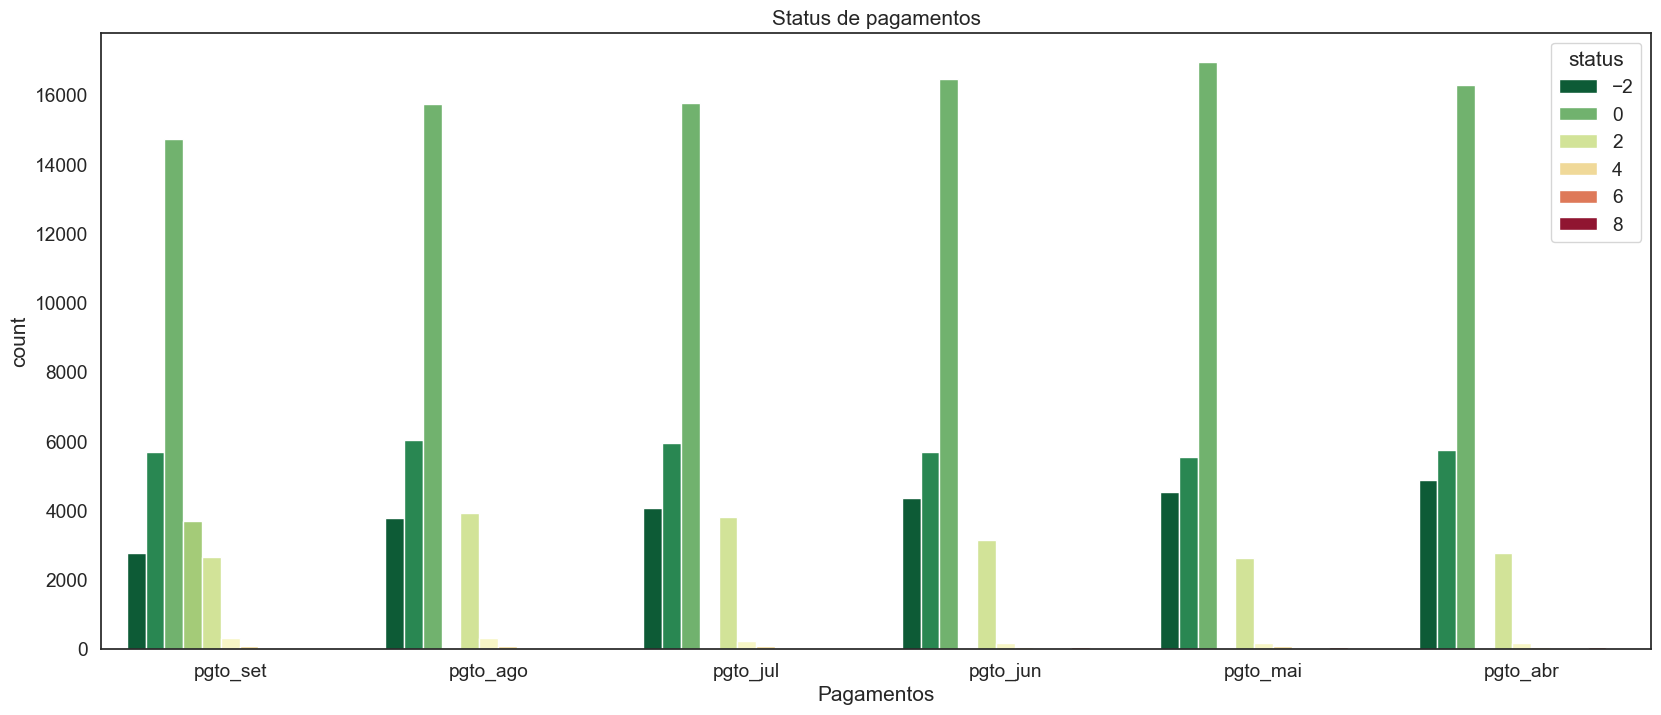

In [89]:
plt.figure(figsize=(20, 8))
sns.countplot(x="Pagamentos", hue="status",
              data=pd.melt(df_pgto, var_name='Pagamentos', value_name='status'), palette='RdYlGn_r')
plt.title('Status de pagamentos')
plt.show()

__Considerações da análise univarida__
* A base possui 30.000 observações e cada observação corresponde a um cliente diferente sendo 23.364 (77,9%) de clientes que permaneceram em default e 6.636 (22,1%) de clientes que conseguiram honrar seus compromissos de crédito no mês de outubro, ou seja, deixaram de ser inadimplentes;   
* Quanto à distribuição de gênero, predomina o gênero feminino com (60,4%);
* Quanto à distribuição do nível de escolaridade da base, podemos confirmar que a grande maioria está presente nas faixas mais altas. 84% (24.615) da base tem grau de escolaridade acima do nível _high school_ , equivalente ao ensino médio brasileiro. Apenas 1,5% (468) tem um nível de escolaridade desconhecido ou abaixo do ensino médio.
* O estado civíl dos clientes encontra-se balanceado, sendo 15.964 clientes solteiros, 13.659 clientes casados e 377 clientes que provavelmente são divorciados ou viúvos, marcados na categoria _others_ ;
* A idade dos clientes está entre 21 e 79 anos, no entanto, 75% da base tem abaixo de 41 anos.
* O limite dos clientes varia entre 10.000 e 1.000.000 dólares, no entanto, apenas 25% dos clientes têm limite acima de 240.000 dólares e apenas 1 cliente na base possui o limite máximo.
* A maioria da base costuma utilizar predominantemente o crédito rotativo. O crédito rotativo, correspondente ao status de pagamento igual a zero e equivale em média a 52% do status de pagamento da base. Esse status aparece quando o cliente não é capaz de pagar o valor completo da fatura. Algumas inconsistências no status de pagamento foram detectadas e serão exploradas mais adiante.
* A média dos valores das faturas vão aumentando ao longo do tempo. Em abril, as faturas eram em média no valor de 38.871 dólares, já no mês de setembro esse número foi para 51.223. Os valores mais altos foram registrados no mês de Julho, chegando até 1.6 milhão de dólares. Uma hipótese que justifique esse fenômeno é que boa parte dos clientes costumam usar a modalidade do crédito rotativo a medida que não são capazes de pagar o valor total da fatura, sendo assim os juros acrescidos tende a aumentar o valor das faturas dos meses posteriores.
* Foram identificadas muitas faturas com valores negativos, a hipótese inicial é de que o cliente tenha pago acima do valor devido, no entanto, essa hipótese será verificada posteriormente.
* A média dos valores dos pagamentos oscila entre 4.799 dólares, registrado no mês de maio, até 5.921 dólares, referente ao pagamento mês de agosto.


## Análise Multivariada
<a id='mda'></a>

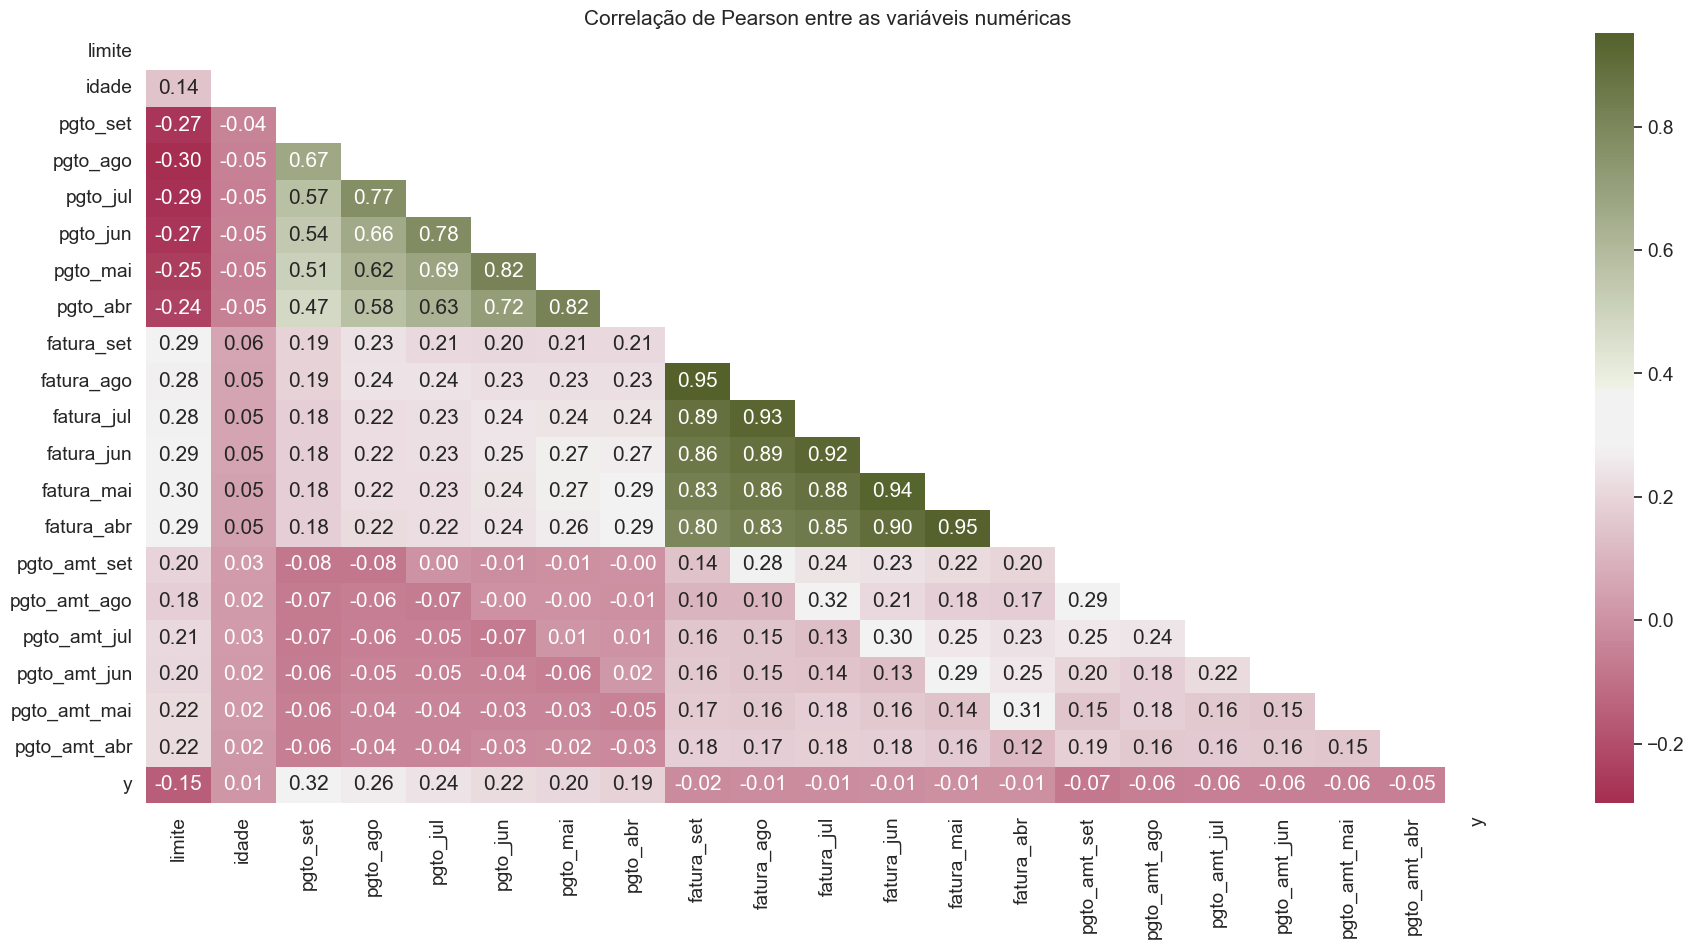

In [90]:
num_feat_corr = df.select_dtypes(exclude='object').iloc[:, 1:].corr()
mask = np.triu(np.ones_like(num_feat_corr, dtype=bool))
plt.figure(figsize=(22, 10))
sns.heatmap(num_feat_corr, mask=mask, fmt='.2f', cmap=cmap, annot=True)
plt.title('Correlação de Pearson entre as variáveis numéricas')
plt.show()

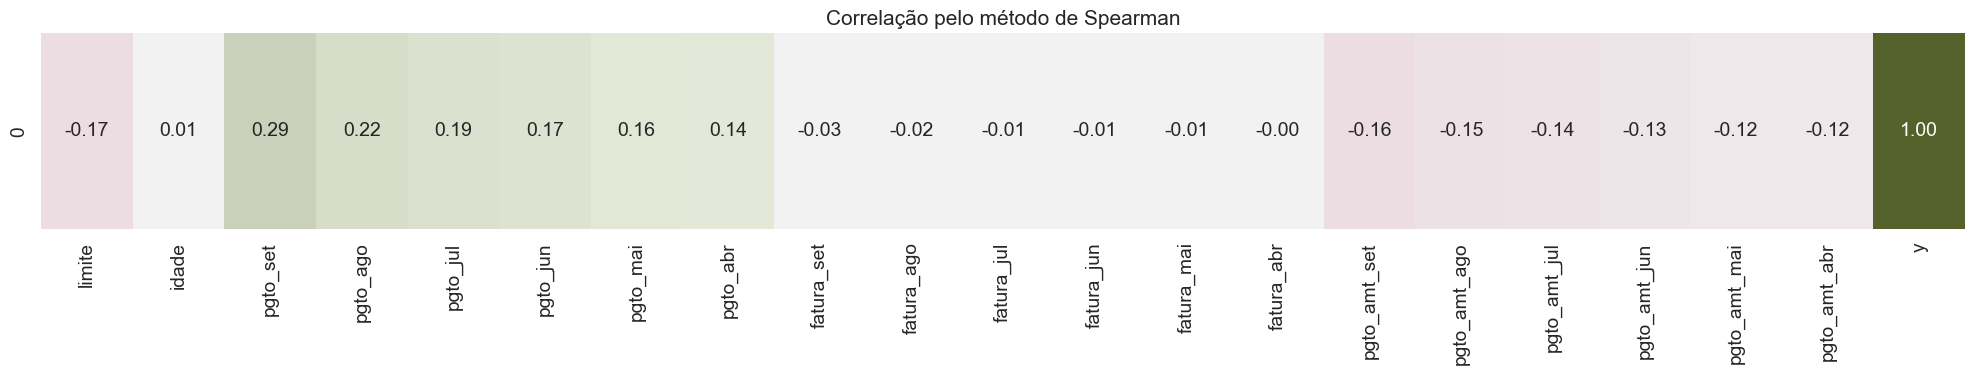

In [91]:
plt.figure(figsize=(20, 4))
corrmat = df.select_dtypes(
    exclude='object').iloc[:, 1:].corr(method='spearman')
sns.heatmap([corrmat['y']], xticklabels=corrmat.index,
            annot=True, fmt='.2f', annot_kws={'size': 14},
            cbar=False, center=0, cmap=cmap)
plt.title('Correlação pelo método de Spearman')

plt.tight_layout()
plt.show()

__Chi-square__

$H_0$ : Variável e target são independentes (Não associadas)   
$H_1$: Variável e target não são independentes (São associadas) 

Resultado:

p-valor $\leq \alpha$ : Rejeitar a hipótetse nula ($H_0$), há dependencia entre a varável e o target.   
p-valor > $\alpha$: Não há evidencias suficientes para rejeitar $H_0$, variável e target independentes.

In [92]:
chisquare(df, target='y')

Há dependencia entre genero e y. P-valor: 4.944678999412027e-12
Há dependencia entre educacao e y. P-valor: 1.4950645648106367e-34
Há dependencia entre estado_civil e y. P-valor: 7.790720364202813e-07


**Análises mistas**

In [93]:
# Criando faixas para variáveis numéricas
df['limit_bins'] = pd.qcut(df['limite'], q=10).astype('str')
df['idade_bins'] = pd.qcut(df['idade'], q=10).astype('str')
df['pgto_amt_set_bins'] = pd.qcut(
    df['pgto_amt_set'], q=10, duplicates='drop').astype('str')

# Bad rate por variável
idade_bins = corr_2_cols(df, df['idade_bins'], df['y'])
limit_bins = corr_2_cols(df, df['limit_bins'], df['y'])
pgto_amt_set_bins = corr_2_cols(df, df['pgto_amt_set_bins'], df['y'])
genero = corr_2_cols(df, df['genero'], df['y']).sort_values('frequencia(%)')
educacao = corr_2_cols(df, df['educacao'], df['y']
                       ).sort_values('frequencia(%)')
estado_civil = corr_2_cols(
    df, df['estado_civil'], df['y']).sort_values('frequencia(%)')

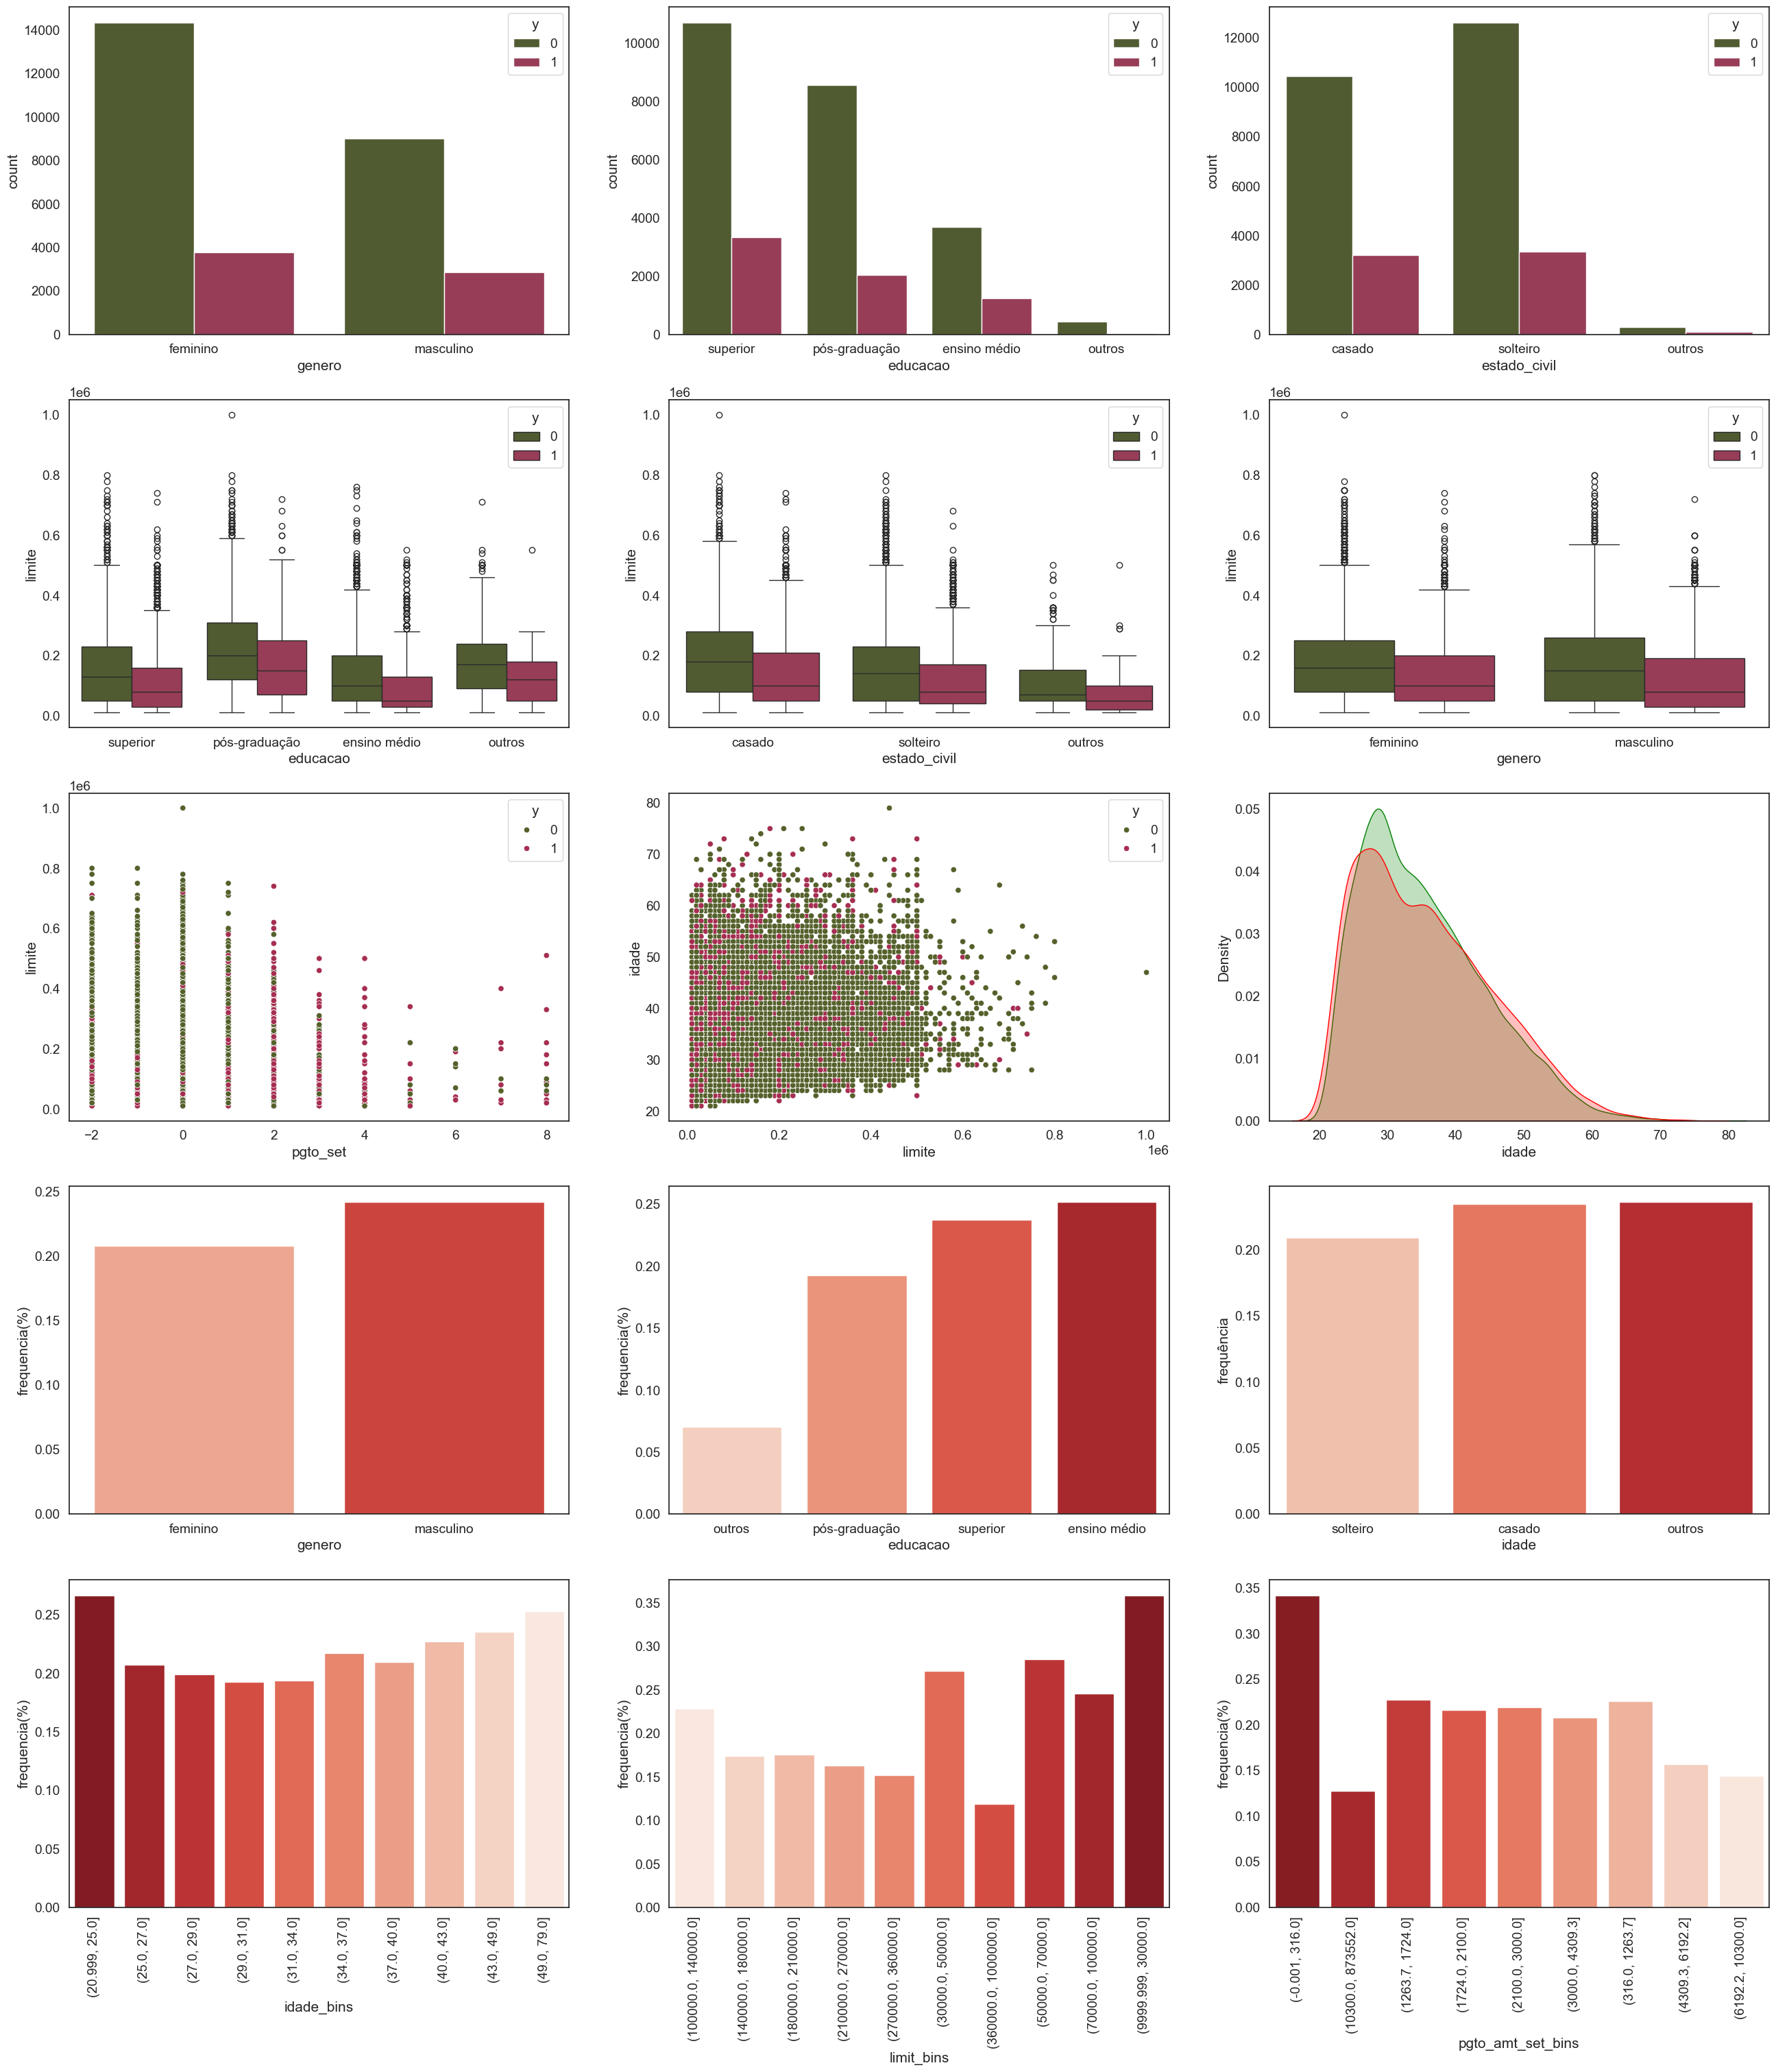

In [94]:
fig, ax = plt.subplots(5, 3, figsize=(32, 36))
sns.countplot(x='genero', hue='y', data=df, ax=ax[0, 0], palette=customPal)
sns.countplot(x='educacao', hue='y', data=df, ax=ax[0, 1], palette=customPal)
sns.countplot(x='estado_civil', hue='y', data=df,
              ax=ax[0, 2], palette=customPal)
sns.boxplot(x='educacao', y='limite', hue='y',
            data=df, ax=ax[1, 0], palette=customPal)
sns.boxplot(x='estado_civil', y='limite', hue='y',
            data=df, ax=ax[1, 1], palette=customPal)
sns.boxplot(x='genero', y='limite', hue='y',
            data=df, ax=ax[1, 2], palette=customPal)
sns.scatterplot(y='limite', x='pgto_set',  hue='y',
                data=df, ax=ax[2, 0], palette=customPal)
sns.scatterplot(x='limite', y='idade',  hue='y',
                data=df, ax=ax[2, 1], palette=customPal)
sns.kdeplot(data=df[df['y'] == 0]['idade'], shade=True,
            label='y = 0', color='g', ax=ax[2, 2])
sns.kdeplot(data=df[df['y'] == 1]['idade'], shade=True,
            label='y = 1', color='r', ax=ax[2, 2])


sns.barplot(data=genero, x=genero.index,
            y='frequencia(%)', ax=ax[3, 0], palette='Reds')
sns.barplot(data=educacao, x=educacao.index,
            y='frequencia(%)', ax=ax[3, 1], palette='Reds')
sns.barplot(data=estado_civil, x=estado_civil.index,
            y='frequencia(%)', ax=ax[3, 2], palette='Reds')
sns.barplot(data=idade_bins, x=idade_bins.index,
            y='frequencia(%)', palette='Reds_r', ax=ax[4, 0])
sns.barplot(data=limit_bins, x=limit_bins.index,
            y='frequencia(%)', palette='Reds', ax=ax[4, 1])
sns.barplot(data=pgto_amt_set_bins, x=pgto_amt_set_bins.index,
            y='frequencia(%)', palette='Reds_r', ax=ax[4, 2])


# nomeando eixos do kdeplot
ax[3, 2].set_xlabel('idade')
ax[3, 2].set_ylabel('frequência')

# rotacionando legenda do eixo x
ax[4, 0].set_xticklabels(ax[4, 0].get_xticklabels(), rotation=90)
ax[4, 1].set_xticklabels(ax[4, 1].get_xticklabels(), rotation=90)
ax[4, 2].set_xticklabels(ax[4, 2].get_xticklabels(), rotation=90)

plt.show()

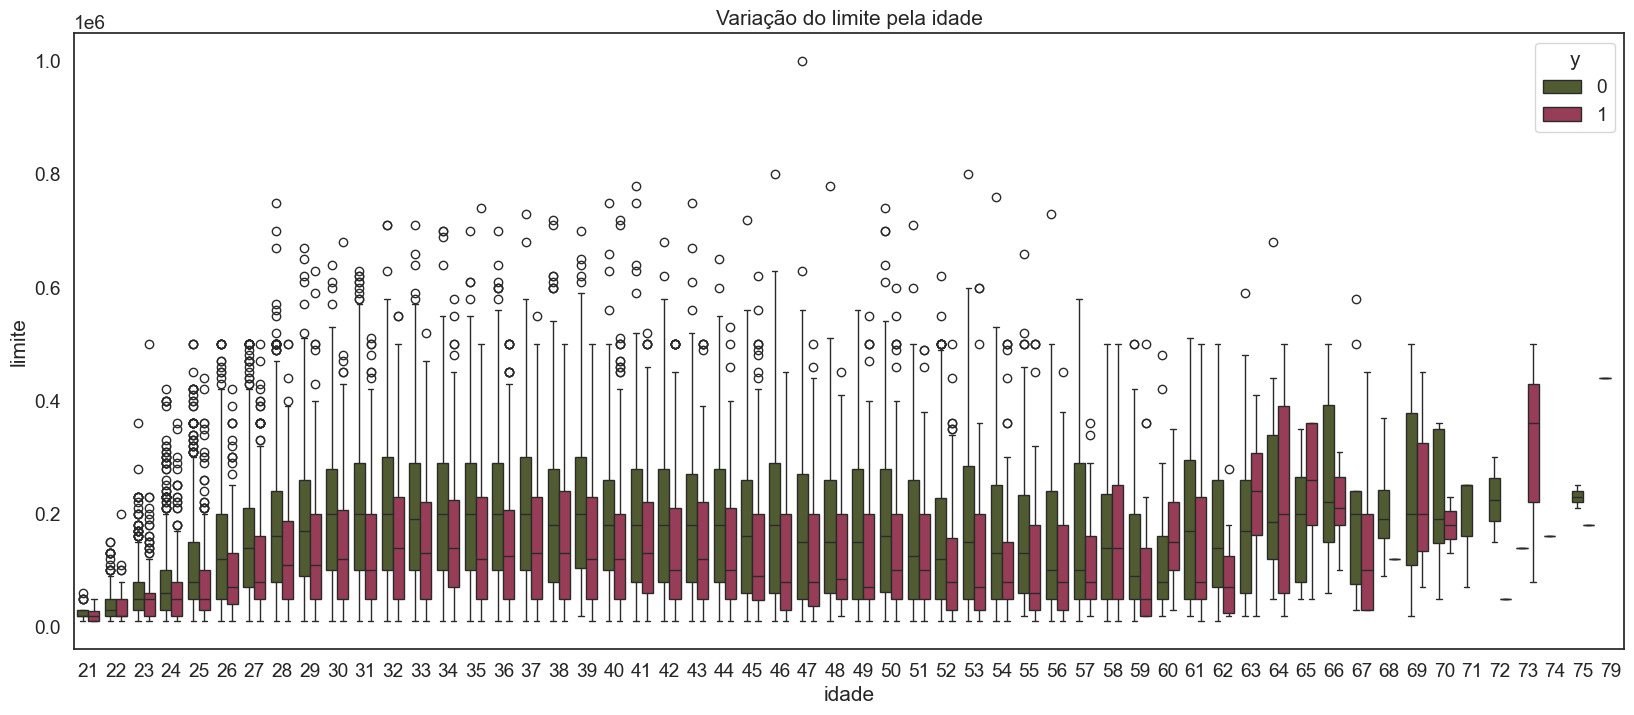

In [95]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='idade', y='limite', hue='y', data=df, palette=customPal)
plt.title('Variação do limite pela idade')
plt.show()

__Considerações da análise multivariada__

* As relações entre as colunas ``fatura`` e ``pgto`` se dão da seguinte forma:   
A fatura do mês Abril é paga no mês de Maio, sendo assim, o **BILL_AMT_6** deve ser pago no **PAY_AMT_5**, o **BILL_AMT_5** deve ser pago no **PAY_AMT_4** e assim por diante.
* A correlação de Pearson entre colunas ``fatura`` são altamente correlacionada, o mesmo acontece entre as variáveis de status de pagamento, ``pgto``, essas variaveis e devem ser agrupadas se forem utilizadas em modelos lineares como a regressão logistica
* A correlação de Spearman mede a relação monotônica entre variáveis e é mais indicada na correlação entre variaveis categoricas e númericas. Foi verificado que a ``pgto_set`` possui a maior correlação o target.
* O teste de chi-square foi utilizado para medir a dependência entre as variaveis categóricas com o target. Os p-valores abaixo de 0,05 reforçam que há dependência entre as variáveis categóricas e o default.
* 60% da base são mulheres e dessas, 20% são clientes default, já os homens correspondem a cerca de 40% da base e 24% dos clientes default.
* 25% dos clientes default possuem apenas o ensino médio, apenas 19% possuem pós graduação.
* 23% dos clientes default possuem estado civil outros.
* De modo geral, os limites dos clientes default são inferiores aos limites do clientes não default, embora  essa lógica pareça mudar para clientes com idades nas faixas mais altas, não há volumetria suficiente para concluirmos isso.
* O status de pagemento de setembro é uma variavel bastante explicativa, pois os clientes default estão concentrados predominantemente nos status entre 1 e 8.

## Feature Engineering
<a id='feateng'></a>

* **atraso** - variável binária que indica se o cliente está atrasado no mês analisado.
* **saldo** - diferença entre a fatura e o pagamento no mês analisado
* **despesa** - as despesas são a fatura do mês atual somado aos pagamentos das faturas dos meses anteriores e normalizado pelo limite.
* **limit_rate** - o percentual do limite que foi consumido no mês

### Atraso

As variaveis de status de pagamento possuem um forte poder preditivo quando comparado com as demais variaveis presentes no dataset, porém, devido às inconsistências encontradas nessas variáveis, foi visto a necessidade da criação de variaveis mais interpretáveis e nesse sentido foram criadas as colunas que indicam o atraso menasal. Esse grupo de variáveis diz se o cliente está em atraso ou não com base nas colunas de status de pagamento e em regras de negócio.

Os valores dos staus de pagamento -1 e -2 indicam, respectivamente, se o cliente está em dia com o pagamento ou se não está utilizando o crédito. Os valores do status de pagamento positivo, indicam a quantidade de meses em atraso. No entanto, o valor ZERO indica que o cliente encontra-se utilizando o crédito rotativo. Será verificado se esse  status de pagamento tem maior correlação com o default quando classificado como atraso.

Assumindo que crédito rotativo seja uma caracteristica de clientes predominantemente em dia, foi criada a dummy ``atraso`` :

\begin{equation*}
atraso_i = \left\{\begin{matrix}
0, ~pgto_i \leq 0\\ 
1, ~pgto_i > 0
\end{matrix}\right.
\end{equation*}

, em que _i_ representa o mês no histórico dos clientes

In [96]:
df['atraso_set'] = np.where(df['pgto_set'] > 0, 1, 0)
df['atraso_ago'] = np.where(df['pgto_ago'] > 0, 1, 0)
df['atraso_jul'] = np.where(df['pgto_jul'] > 0, 1, 0)
df['atraso_jun'] = np.where(df['pgto_jun'] > 0, 1, 0)
df['atraso_mai'] = np.where(df['pgto_mai'] > 0, 1, 0)
df['atraso_abr'] = np.where(df['pgto_abr'] > 0, 1, 0)

A variavel ``atraso_set`` indica se o cliente está em atraso no mês de setembro, sua correlação com o target já é maior do que todas as demais variáveis presentes no dataset, indicando que esta é uma variável promissora que provavlemente poderá melhorar a performance dos modelos, além do fato de ser mais interpretável que as variáveis de status de pagamento.

Levando em consideração as análises prévias das inconsistências nas variáveis de status de pagamento, serão considerados clientes sem atraso aqueles que possuem a fatura negativa.

In [97]:
df['atraso_set'] = np.where(df['pgto_set'] > 0, 1, 0)
df.loc[df['fatura_set'] < 0, 'atraso_set'] = 0

df['atraso_ago'] = np.where(df['pgto_ago'] > 0, 1, 0)
df.loc[df['fatura_ago'] < 0, 'atraso_ago'] = 0

df['atraso_jul'] = np.where(df['pgto_jul'] > 0, 1, 0)
df.loc[df['fatura_jul'] < 0, 'atraso_jul'] = 0

df['atraso_jun'] = np.where(df['pgto_jun'] > 0, 1, 0)
df.loc[df['fatura_jun'] < 0, 'atraso_jun'] = 0

df['atraso_mai'] = np.where(df['pgto_mai'] > 0, 1, 0)
df.loc[df['fatura_mai'] < 0, 'atraso_mai'] = 0

df['atraso_abr'] = np.where(df['pgto_abr'] > 0, 1, 0)
df.loc[df['fatura_abr'] < 0, 'atraso_abr'] = 0

### Saldo

Esse grupo de variáveis numéricas mede a diferença entre a fatura e o pagamento mensal normalizado pelo limite.

\begin{equation*}
saldo_i = \frac{fatura_i - pagamento_{i+1}}{limite} 
\end{equation*}

, em que $i$ representa o mês atual e $i+1$ o mês futuro em que é realizado o pagamento do mês anterior, portanto, o pagamento da $fatura_i$.

Por exemplo, o fechamento da fatura de abril é realizado no final do mês e seu pagamento é realizado no mês de maio, logo, o saldo de abril é exatamente o quanto da fatura de abril foi paga pelo cliente.
Como o pagamento da fatura de setembro só é realizado em outubro, as variáveis de saldo são do mês de abril ao mês de agosto.

In [98]:
df['saldo_amt_ago'] = (df['fatura_ago'] - df['pgto_amt_set'])/df['limite']
df['saldo_amt_jul'] = (df['fatura_jul'] - df['pgto_amt_ago'])/df['limite']
df['saldo_amt_jun'] = (df['fatura_jun'] - df['pgto_amt_jul'])/df['limite']
df['saldo_amt_mai'] = (df['fatura_mai'] - df['pgto_amt_jun'])/df['limite']
df['saldo_amt_abr'] = (df['fatura_abr'] - df['pgto_amt_mai'])/df['limite']

### Despesas

As despesas são a fatura do mês atual somado aos pagamentos das faturas dos meses anteriores e normalizado pelo limite.

\begin{equation*}
despesa_n = \frac{fatura_{n} + \sum_{i}^{n} (fatura_{i} - pagamento_{i+1})}{limite} 
\end{equation*}

In [99]:
df['despesa_abr'] = (df_fatura.iloc[:, -2:].sum(axis=1) -
                     df_pgto_amt['pgto_amt_mai']) / df['limite']
df['despesa_mai'] = (df_fatura.iloc[:, -3:].sum(axis=1) -
                     df_pgto_amt.iloc[:, -2:].sum(axis=1)) / df['limite']
df['despesa_jun'] = (df_fatura.iloc[:, -4:].sum(axis=1) -
                     df_pgto_amt.iloc[:, -3:].sum(axis=1)) / df['limite']
df['despesa_jul'] = (df_fatura.iloc[:, -5:].sum(axis=1) -
                     df_pgto_amt.iloc[:, -4:].sum(axis=1)) / df['limite']
df['despesa_ago'] = (df_fatura.iloc[:, -6:].sum(axis=1) -
                     df_pgto_amt.iloc[:, -5:].sum(axis=1)) / df['limite']

### Porcentagem do limite utilizado

A porcentagem do limite utilizado é basicamente o quanto do limite o cliente consome por mês, intuitivamente, clientes que tem uma utilização de crédito próxima ao valor do seu limite tende a ser mais arriscado. Clientes com faturas negativas possuem um limit_rate negativo, no entanto, o valor mínimo de limit_rate foi truncado para 0, uma vez que não tem muito sentido prático afirmar que o clientes possui uma taxa de consumo de limite negativa.

\begin{equation*}
limit ~rate_i = 1 -\frac{limite - fatura_{i}} {limite}
\end{equation*}

In [100]:
df['limit_rate_set'] = 1-((df['limite'] - df['fatura_set']) / df['limite'])
df['limit_rate_ago'] = 1-((df['limite'] - df['fatura_ago']) / df['limite'])
df['limit_rate_jul'] = 1-((df['limite'] - df['fatura_jul']) / df['limite'])
df['limit_rate_jun'] = 1-((df['limite'] - df['fatura_jun']) / df['limite'])
df['limit_rate_mai'] = 1-((df['limite'] - df['fatura_mai']) / df['limite'])
df['limit_rate_abr'] = 1-((df['limite'] - df['fatura_abr']) / df['limite'])

df.loc[(df['limit_rate_set'] < 0, 'limit_rate_set')] = 0
df.loc[(df['limit_rate_ago'] < 0, 'limit_rate_ago')] = 0
df.loc[(df['limit_rate_jul'] < 0, 'limit_rate_jul')] = 0
df.loc[(df['limit_rate_jun'] < 0, 'limit_rate_jun')] = 0
df.loc[(df['limit_rate_mai'] < 0, 'limit_rate_mai')] = 0
df.loc[(df['limit_rate_abr'] < 0, 'limit_rate_abr')] = 0

## Correlação entre as novas variáveis

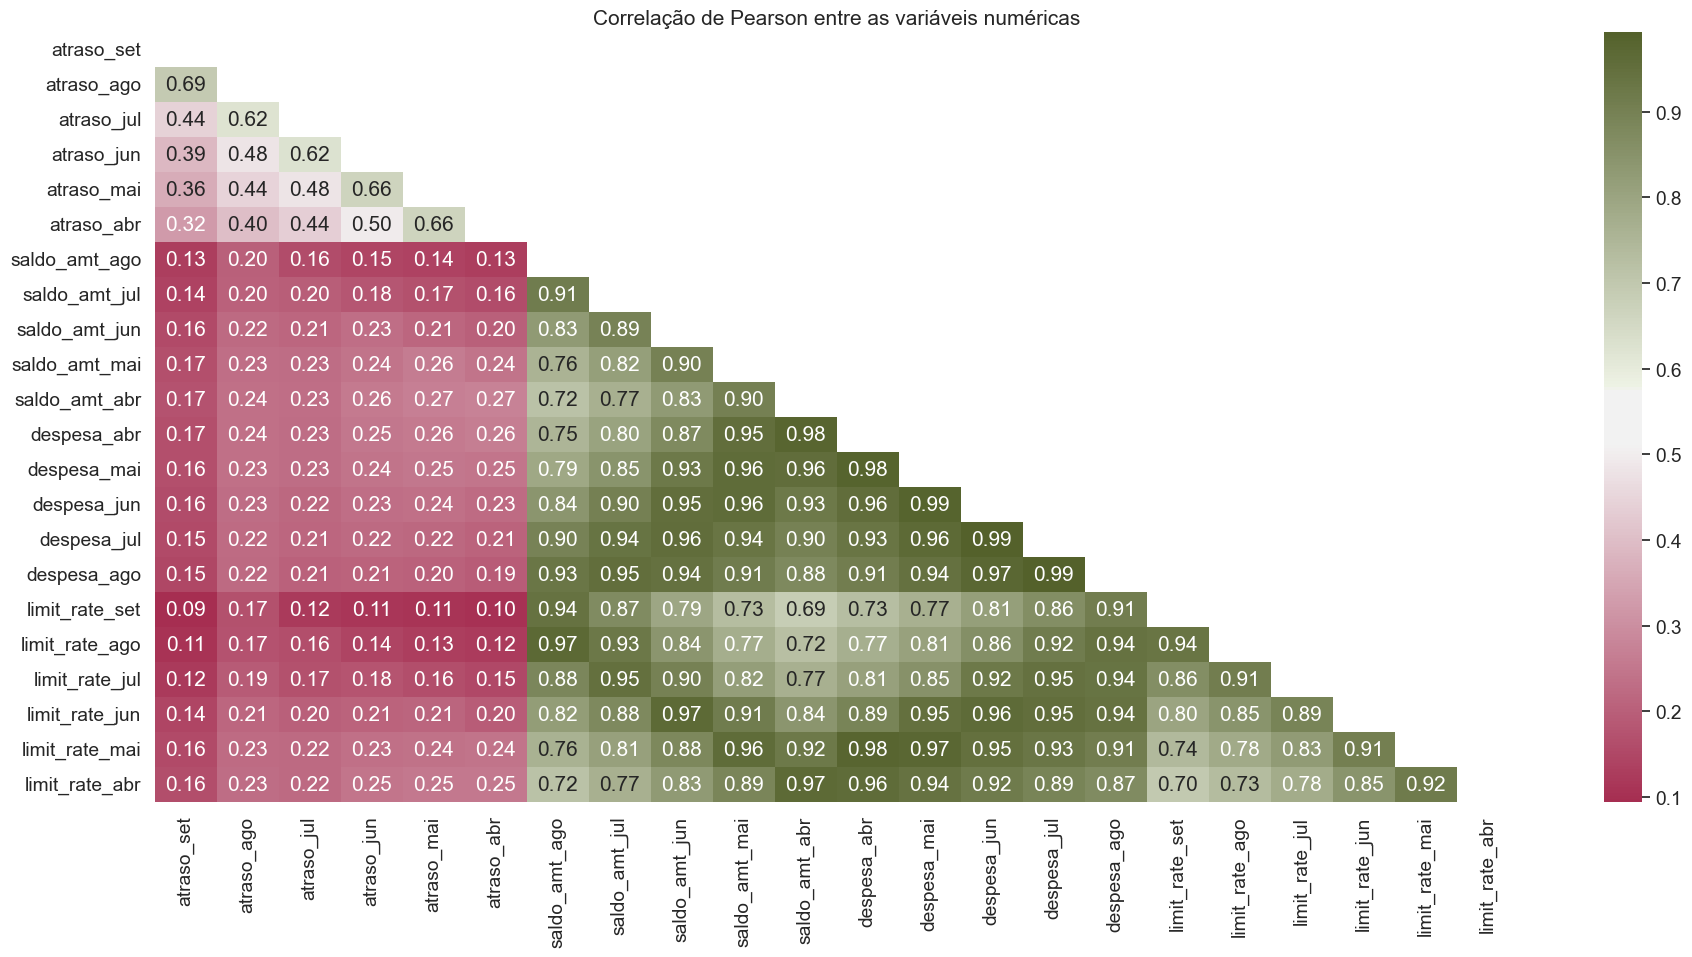

In [101]:
num_feat_corr = df.filter(regex='limit_rate|despesa|saldo|atraso').corr()
mask = np.triu(np.ones_like(num_feat_corr, dtype=bool))
plt.figure(figsize=(22, 10))
sns.heatmap(num_feat_corr, mask=mask, fmt='.2f', cmap=cmap, annot=True)
plt.title('Correlação de Pearson entre as variáveis numéricas')
plt.show()

## Salvando novo dataframe

In [102]:
df['genero'] = df['genero'].replace({'masculino': 1, 'feminino': 2})
df['educacao'] = df['educacao'].replace(
    {'pós-graduação': 1, 'superior': 2,  'ensino médio': 3, 'outros': 4})
df['estado_civil'] = df['estado_civil'].replace(
    {'casado': 1, 'solteiro': 2, 'outros': 3})

df = df.drop(['limit_bins', 'idade_bins', 'pgto_amt_set_bins'], axis=1)

In [103]:
df.to_csv('data/data_train_preproc.csv', index=False)